# **DATA TRANSACTIONS && IMPORT LIBRARY**

In [ ]:
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import cv2
import os

from sklearn.model_selection import train_test_split, GridSearchCV , cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report , mean_absolute_error , mean_squared_error

from sklearn import model_selection
from warnings import filterwarnings
filterwarnings('ignore')

from keras.layers import Input, Dense, Activation, BatchNormalization, Flatten, Conv2D, MaxPooling2D, Dropout
from keras.models import Sequential

import tensorflow as tf
from tensorflow import keras

file_path = '/content/PSSP.xlsx'
data = pd.read_excel(file_path,index_col=0)


In [ ]:
print(data.head())
#data.dropna(subset=['Sınıflar'], inplace=True)
print(data.describe())
# Eksik veri kontrolü
print(data.isnull().sum())
#data['Seq'].apply(lambda x: isinstance(x, str))
#data = data[data['Seq'].apply(lambda x: isinstance(x, str))]
data = data.fillna('z')
data['Sınıflar'] = data['Sınıflar'].astype(str)


                       Seq             Structure Sınıflar
ID                                                       
1FV1  NPVVHFFKNIVTPRTPPPSQ  CCCCCBCCCCCCCCCCCCCC        C
1LM8  DLDLEMLAPYIPMDDDFQLR  CCCCCCCCCBCCSCCCEECC        B
1O06  EEDPDLKAAIQESLREAEEA  CCCHHHHHHHHHHHHHHHTC        S
1QOW  CTFTLPGGGGVCTLTSECI*  CCTTSCTTCSSTTSSTTCCC        E
1RDQ  TTYADFIASGRTGRRNAIHD  CHHHHHHTSSCSSCCCCEEC        T
                         Seq                             Structure Sınıflar
count                   2399                                  2400        8
unique                  2399                                  2393        8
top     NPVVHFFKNIVTPRTPPPSQ  CCHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHCC        C
freq                       1                                     2        1
Seq             1
Structure       0
Sınıflar     2392
dtype: int64


# **CPNR**

In [ ]:
import numpy as np
import pandas as pd

amino_acid_properties = {
    'A': [0.87, 0.67, 0.36, 0.6],
    'B': [0.1, 0.45, 0.89, 0.23],
    'C': [0.67, 0.73, 0.45, 0.87],
    'D': [0.45, 0.23, 0.67, 0.1],
    'E': [0.23, 0.1, 0.1, 0.45],
    'F': [0.6, 0.87, 0.73, 0.67],
    'G': [0.36, 0.89, 0.87, 0.73],
    'H': [0.73, 0.6, 0.6, 0.36],
    'I': [0.89, 0.36, 0.23, 0.6],
    'K': [0.1, 0.1, 0.6, 0.1],
    'L': [0.67, 0.6, 0.87, 0.89],
    'M': [0.73, 0.36, 0.1, 0.67],
    'N': [0.45, 0.6, 0.67, 0.73],
    'P': [0.1, 0.23, 0.36, 0.45],
    'Q': [0.23, 0.45, 0.6, 0.36],
    'R': [0.6, 0.1, 0.45, 0.23],
    'S': [0.36, 0.67, 0.73, 0.45],
    'T': [0.6, 0.45, 0.23, 0.1],
    'V': [0.87, 0.73, 0.1, 0.67],
    'W': [0.87, 0.6, 0.67, 0.73],
    'Y': [0.73, 0.87, 0.6, 0.6],
    '*': [0.0, 0.0, 0.0, 0.0]
}


def CPNR_encode(sequence):
    encoded_sequence = []
    for residue in sequence:
        encoded_residue = amino_acid_properties.get(residue, amino_acid_properties['*'])
        encoded_sequence.extend(encoded_residue)
    return encoded_sequence


data['Encoded_Seq'] = data['Seq'].apply(lambda x: CPNR_encode(x) if isinstance(x, str) else x)


print("CPNR ile Sayısallaştırılmış Veri:")
print(data['Encoded_Seq'])

CPNR ile Sayısallaştırılmış Veri:
ID
1FV1    [0.45, 0.6, 0.67, 0.73, 0.1, 0.23, 0.36, 0.45,...
1LM8    [0.45, 0.23, 0.67, 0.1, 0.67, 0.6, 0.87, 0.89,...
1O06    [0.23, 0.1, 0.1, 0.45, 0.23, 0.1, 0.1, 0.45, 0...
1QOW    [0.67, 0.73, 0.45, 0.87, 0.6, 0.45, 0.23, 0.1,...
1RDQ    [0.6, 0.45, 0.23, 0.1, 0.6, 0.45, 0.23, 0.1, 0...
                              ...                        
1J5U    [0.73, 0.36, 0.1, 0.67, 0.36, 0.89, 0.87, 0.73...
1LU4    [0.87, 0.67, 0.36, 0.6, 0.45, 0.23, 0.67, 0.1,...
1O13    [0.73, 0.36, 0.1, 0.67, 0.36, 0.89, 0.87, 0.73...
1U7I    [0.36, 0.89, 0.87, 0.73, 0.73, 0.6, 0.6, 0.36,...
NaN                                  [0.0, 0.0, 0.0, 0.0]
Name: Encoded_Seq, Length: 2400, dtype: object


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences


X = np.array(data['Encoded_Seq'].tolist())
y = data['Sınıflar']

label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_test.shape)
print(X_train.shape)
print(y_test.shape)
print(y_train.shape)



(480,)
(1920,)
(480,)
(1920,)


# **LSTM**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

X_train_df = pd.DataFrame(X_train, columns=['Seq'])
X_test_df = pd.DataFrame(X_test, columns=['Seq'])

for col in ['Seq']:
    X_train_df[col] = X_train_df[col].apply(lambda x: str(x[0]) if pd.notna(x[0]) else "")
    X_test_df[col] = X_test_df[col].apply(lambda x: str(x[0]) if pd.notna(x[0]) else "")

tokenizer = Tokenizer(char_level=True)
tokenizer.fit_on_texts(X_train_df['Seq'])

max_len = max(len(seq) for seq in X_train_df['Seq'])

X_train_padded = pad_sequences(tokenizer.texts_to_sequences(X_train_df['Seq']), maxlen=max_len)
X_test_padded = pad_sequences(tokenizer.texts_to_sequences(X_test_df['Seq']), maxlen=max_len)

from keras.layers import Embedding, LSTM, Dense, Dropout, SpatialDropout1D, Bidirectional, BatchNormalization, GlobalMaxPooling1D
from keras.callbacks import EarlyStopping

model = Sequential()
model.add(Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=50, input_length=max_len))
model.add(SpatialDropout1D(0.2))
model.add(Bidirectional(LSTM(50, return_sequences=True)))
model.add(GlobalMaxPooling1D())
model.add(Dense(25, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))

optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy', tf.keras.metrics.Recall()])

early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

model.fit(X_train_padded, y_train, epochs=5, batch_size=32, validation_data=(X_test_padded, y_test), callbacks=[early_stopping])

y_pred_proba = model.predict(X_test_padded)
y_pred = (y_pred_proba > 0.5).astype(int)

accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print("Doğruluk: ", accuracy)
print("F1 Skoru: ", f1)
print("Kesinlik: ", precision)
print("Duyarlılık: ", recall)
print("Karmaşıklık Matrisi:\n", conf_matrix)




Epoch 1/5
60/60 [==============================] - 5s 22ms/step - loss: 0.4533 - accuracy: 5.2083e-04 - recall_15: 0.9833 - val_loss: 0.2099 - val_accuracy: 0.0000e+00 - val_recall_15: 1.0000
Epoch 2/5
60/60 [==============================] - 0s 5ms/step - loss: -0.1041 - accuracy: 5.2083e-04 - recall_15: 1.0000 - val_loss: -0.5170 - val_accuracy: 0.0000e+00 - val_recall_15: 1.0000
Epoch 3/5
60/60 [==============================] - 0s 5ms/step - loss: -1.0927 - accuracy: 5.2083e-04 - recall_15: 1.0000 - val_loss: -1.8616 - val_accuracy: 0.0000e+00 - val_recall_15: 1.0000
Epoch 4/5
60/60 [==============================] - 0s 5ms/step - loss: -2.9466 - accuracy: 5.2083e-04 - recall_15: 1.0000 - val_loss: -4.3878 - val_accuracy: 0.0000e+00 - val_recall_15: 1.0000
Epoch 5/5
15/15 [==============================] - 1s 2ms/step
Doğruluk:  0.0
F1 Skoru:  0.0
Kesinlik:  0.0
Duyarlılık:  0.0
Karmaşıklık Matrisi:
 [[  0   0]
 [480   0]]


ROC CURVE FOR LTSM



15/15 [==============================] - 0s 2ms/step


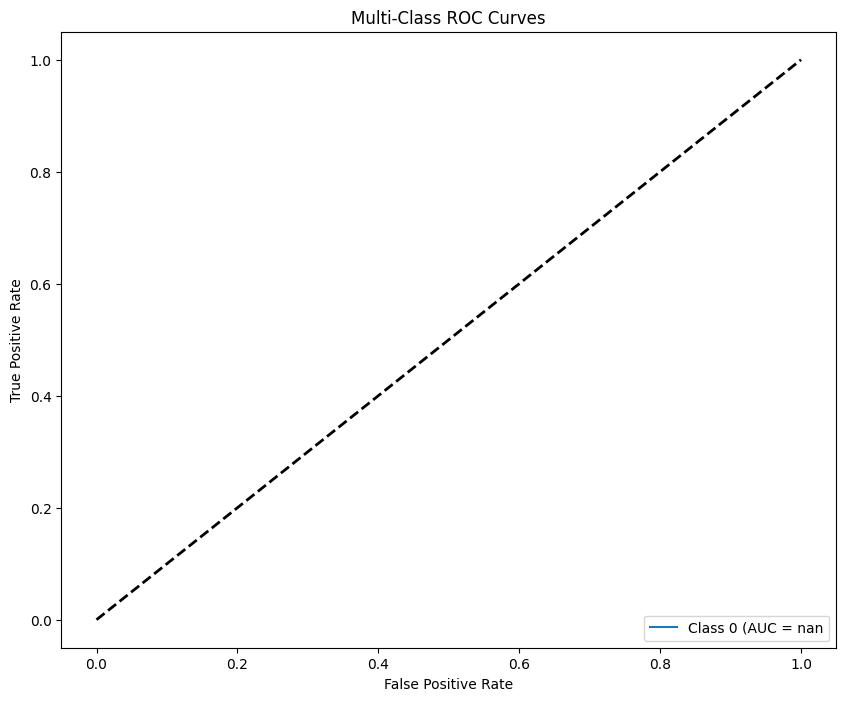

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_auc_score
from itertools import cycle

y_pred_proba = model.predict(X_test_padded)

n_classes = len(np.unique(y_test))

y_test_bin = label_binarize(y_test, classes=np.unique(y_test))

plt.figure(figsize=(10, 8))
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    plt.plot(fpr[i], tpr[i], label=f'Class {i} (AUC = {roc_auc[i]:.2f}')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multi-Class ROC Curves')
plt.legend(loc='lower right')
plt.show()

# **RNN**


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding, SimpleRNN, Dense


X = data['Seq'].values
y = data['Sınıflar'].values


label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)


X_train_sequences = tokenizer.texts_to_sequences(X_train)
X_test_sequences = tokenizer.texts_to_sequences(X_test)


max_sequence_length = max(max(len(seq) for seq in X_train_sequences), max(len(seq) for seq in X_test_sequences))
X_train_padded = pad_sequences(X_train_sequences, maxlen=max_sequence_length, padding='post')
X_test_padded = pad_sequences(X_test_sequences, maxlen=max_sequence_length, padding='post')


model = Sequential()
model.add(Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=100, input_length=max_sequence_length))
model.add(SimpleRNN(units=50, activation='relu'))
model.add(Dense(units=1, activation='sigmoid'))


model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


model.fit(X_train_padded, y_train, epochs=5, batch_size=32, validation_split=0.2)


y_pred_prob = model.predict(X_test_padded)
y_pred = (y_pred_prob > 0.5).astype(int)


accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)


conf_matrix = confusion_matrix(y_test, y_pred)


print(f"Accuracy: {accuracy}")
print(f"F1 Score: {f1}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print("Confusion Matrix:")
print(conf_matrix)

Epoch 1/5
48/48 [==============================] - 2s 21ms/step - loss: -85.2804 - accuracy: 6.5104e-04 - val_loss: -636.5724 - val_accuracy: 0.0000e+00
Epoch 2/5
48/48 [==============================] - 1s 13ms/step - loss: -75513.0312 - accuracy: 6.5104e-04 - val_loss: -484651.0000 - val_accuracy: 0.0000e+00
Epoch 3/5
48/48 [==============================] - 1s 12ms/step - loss: -23881982.0000 - accuracy: 6.5104e-04 - val_loss: -93044184.0000 - val_accuracy: 0.0000e+00
Epoch 4/5
48/48 [==============================] - 1s 13ms/step - loss: -1659200896.0000 - accuracy: 6.5104e-04 - val_loss: -3775772672.0000 - val_accuracy: 0.0000e+00
Epoch 5/5
15/15 [==============================] - 0s 2ms/step
Accuracy: 0.0
F1 Score: 0.0
Precision: 0.0
Recall: 0.0
Confusion Matrix:
[[  0   0]
 [480   0]]


ROC CURVE FOR RNN

15/15 [==============================] - 0s 7ms/step


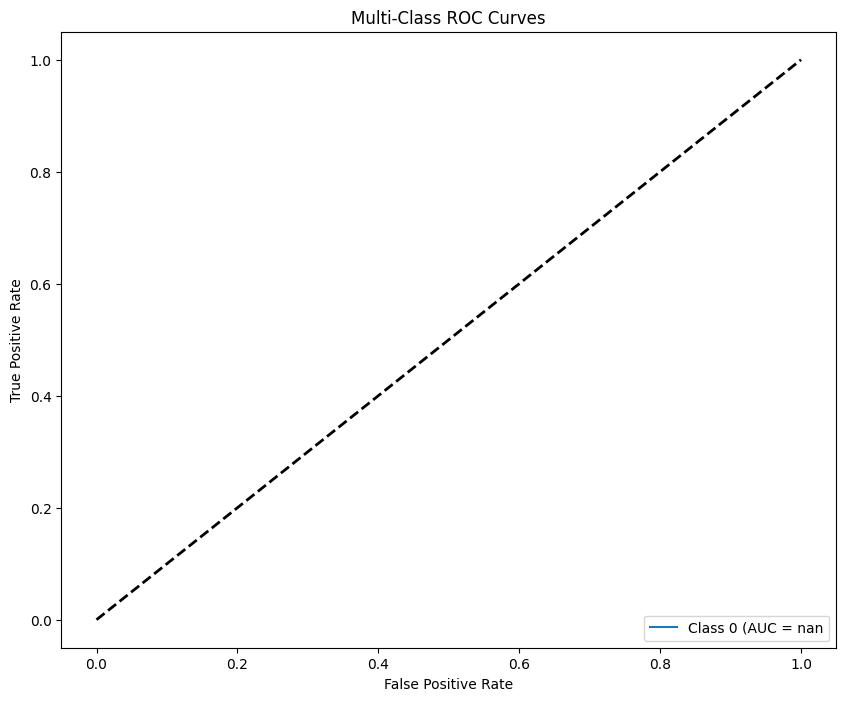

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_auc_score
from itertools import cycle

y_pred_proba = model.predict(X_test_padded)

# Sınıf sayısını al
n_classes = len(np.unique(y_test))


y_test_bin = label_binarize(y_test, classes=np.unique(y_test))


plt.figure(figsize=(10, 8))
fpr = dict()
tpr = dict()
roc_auc = dict()


for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    plt.plot(fpr[i], tpr[i], label=f'Class {i} (AUC = {roc_auc[i]:.2f}')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multi-Class ROC Curves')
plt.legend(loc='lower right')
plt.show()